In [95]:
import numpy as np
from matplotlib import pyplot as plt
import python_weather
import asyncio


In [96]:
gravity = 9.81

In [97]:
def calculate_trajectory(init_vel, angle, wind_speed, time_steps=100000):
    angle_rad = np.radians(angle)
    tf = (2 * init_vel * np.sin(angle_rad)) / gravity  # time of flight
    t = np.linspace(0, tf, num=time_steps)  # time array

    h_vel = init_vel * np.cos(angle_rad)  # horizontal velocity
    v_vel = init_vel * np.sin(angle_rad)  # vertical velocity

    # Adjust horizontal velocity by wind speed
    h_vel_with_wind = h_vel + wind_speed

    # Horizontal and vertical motion calculations
    h_motion = h_vel_with_wind * t
    v_motion = v_vel * t - 0.5 * gravity * t**2

    return h_motion, v_motion


In [98]:
def calculate_time_of_flight(distance, init_vel, angle, wind_speed):
    horizontal_velocity = init_vel * np.cos(np.radians(angle)) + wind_speed
    return distance / horizontal_velocity

def calculate_range_of_flight(init_vel, angle, wind_speed):
    h_vel = init_vel * np.cos(np.radians(angle)) + wind_speed
    time_of_flight = calculate_time_of_flight(init_vel, angle, h_vel, wind_speed)
    return h_vel * time_of_flight

def calculate_maximum_height(init_vel, angle):
    return ((init_vel ** 2) * (np.sin(np.radians(angle))) ** 2) / (2 * gravity)

In [99]:
async def get_wind_speed(city_name):
    client = python_weather.Client(format=python_weather.IMPERIAL)
    weather = await client.find(city_name)
    await client.close()
    return weather.current.wind_speed

In [100]:
#city_name = "Tunis"
#wind_speed = await get_wind_speed(city_name)
distance = float(input("distance in meters : "))
speed = float(input("speed missile in meters per second "))
launch_angle = int(input("launch angule : "))
initial_velocity = np.sqrt((distance*gravity)/(np.sin(2*np.radians(launch_angle))))
wind_speed = int(input("wind speed : "))
time = (2*initial_velocity*np.sin(launch_angle))/gravity

In [101]:
horizontal_motion,vertical_motion = calculate_trajectory(initial_velocity,launch_angle,wind_speed)
time_of_flight = calculate_time_of_flight(distance,initial_velocity,launch_angle,wind_speed)
range_of_flight = calculate_range_of_flight(initial_velocity,launch_angle,wind_speed)
maximum_height = calculate_maximum_height(initial_velocity,launch_angle)

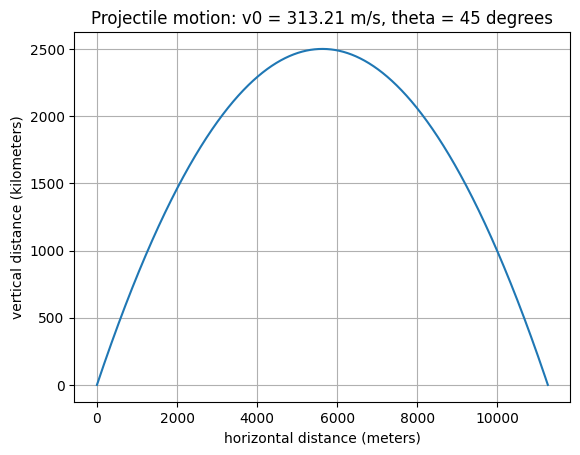

In [102]:
plt.figure()
plt.plot(horizontal_motion,vertical_motion)
plt.title(f'Projectile motion: v0 = {round(initial_velocity,2)} m/s, theta = {launch_angle} degrees')
plt.xlabel('horizontal distance (meters)')
plt.ylabel('vertical distance (kilometers)')
plt.grid(True)
plt.show()

In [106]:
print(f"speed of the missile : {speed}m/s")
print(f"launching angle : {launch_angle}°")
print(f"initial velocity : {initial_velocity}m/s")
print(f"current wind speed : {wind_speed}km/h")
print("------------------------------------------------------------------")
print(f"estimated distance to travel : {round(distance,2)}meters")
print(f"estimated speed of the missile : {round(speed)} meters/second")
print(f"estimated time to get there : {round(time,2)}seconds")
print("------------------------------------------------------------------")
print(f"time of flight : {round(time_of_flight,2)}seconds")
print(f"range of flight : {round(range_of_flight,2)}meters")
print(f"maximum height : {round(maximum_height,2)}meters")

speed of the missile : 100.0m/s
launching angle : 45°
initial velocity : 313.2091952673165m/s
current wind speed : 28km/h
------------------------------------------------------------------
estimated distance to travel : 10000.0meters
estimated speed of the missile : 100 meters/second
estimated time to get there : 54.33seconds
------------------------------------------------------------------
time of flight : 40.08seconds
range of flight : 6394.02meters
maximum height : 2500.0meters
